# CNN network

Ref: https://www.youtube.com/watch?v=zHop6Oq757Y&t=3s<br>
https://github.com/MorvanZhou/tutorials/blob/master/kerasTUT/6-CNN_example.py

Step
1. prepare data
2. preprocess data
3. keras.models.Squential() - build the model 
4. keras.optimizers... - define optimizer
5. model.compile() - choose loss funcion and optimizer
6. model.fit() - train the model
7. model.evaluate() - test the model
8. model.predict() - predict the input

In [1]:
import numpy as np
np.random.seed(1337)    # for reproducibility
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution2D, MaxPooling2D, Flatten
from keras.optimizers import Adam
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# load data from mnist 
# X shape = (60000, 28, 28)/ Y shape = (10000, 28, 28)
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

# preprocess the data
# X reshape to (60000, 784)
# X_train = X_train.reshape(X_train.shape[0], -1) /255    # normalize to 0~1
# X_test = X_test.reshape(X_test.shape[0], -1) /255    # normalize
X_train = X_train.reshape(-1, 1, 28, 28)/255
X_test = X_test.reshape(-1, 1, 28, 28)/255
Y_train = np_utils.to_categorical(Y_train, num_classes=10)  # one-hot encoding
Y_test = np_utils.to_categorical(Y_test, num_classes=10)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)
Y_train shape: (60000,)
Y_test shape: (10000,)
X_train shape: (60000, 1, 28, 28)
X_test shape: (10000, 1, 28, 28)
Y_train shape: (60000, 10)
Y_test shape: (10000, 10)


In [3]:
# build model
model = Sequential()

# Conv layer 1 output shape (32, 28, 28)
model.add(Convolution2D(filters=32, kernel_size=(5,5), padding="same", input_shape=(1,28,28)))
model.add(Activation("relu"))

# pooling layer 1 output shape (32, 14, 14)
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same"))

# Conv layer 2 output shape (64, 14, 14)
model.add(Convolution2D(64, (5, 5), padding="same"))
model.add(Activation("relu"))

# pooling layer 2 output shape (64, 7, 7)
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same"))

# fully conntected layer, input shape(64*7*7)=3136, output shape 1024
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dense(10))
model.add(Activation("softmax"))

# define optimizer
adam = Adam(lr=1e-4)
# choose loss function and optimizer
model.compile(
    loss="categorical_crossentropy", 
    optimizer=adam, 
    metrics=["accuracy"]    # 輸出更多指標在return中 https://keras.io/api/metrics/
)

In [4]:
# train model
print("Training ---------------------")
model.fit(X_train, Y_train, epochs=10, batch_size=32)


Training ---------------------
Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4479 - accuracy: 0.8737
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1673 - accuracy: 0.9502
Epoch 3/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1140 - accuracy: 0.9659
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0879 - accuracy: 0.9734
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0723 - accuracy: 0.97801s - loss: 0.0 - ETA: 0s - loss: 0.0723 - 
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0615 - accuracy: 0.9817
Epoch 7/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0529 - accuracy: 0.9844
Epoch 8/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0476 - accuracy: 0.9857
Epoch 9/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0421 - accuracy: 

In [5]:
# test model
print("Testing ---------------------")
loss, accuracy = model.evaluate(X_test, Y_test)
print("loss: ", loss)
print("accuracy: ", accuracy)

Testing ---------------------
313/313 [==============================] - 1s 3ms/step - loss: 0.0440 - accuracy: 0.9845
loss:  0.04403204470872879
accuracy:  0.984499990940094


TypeError: Invalid shape (1, 28, 28) for image data

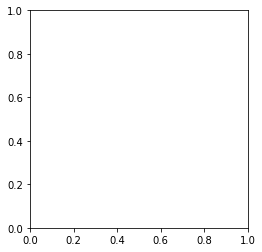

In [6]:
# predict
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

number = X_test[1:2]
plt.imshow(number)
number = number.reshape(-1, 1, 28, 28)
# print(number)
result = model.predict(number)
print(result[0])
